In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import imaging_2021Paper as im
import behaviour_2021Paper as bh
import plotting_help_2021Paper as ph
import traveldirection_2021Paper as td

import matplotlib.gridspec as gridspec
from scipy import stats, ndimage
import copy

import warnings
warnings.filterwarnings('ignore')

## PFNv-Kir

In [ ]:
reload(im)
names = [('2020051901', '2020051902'), ('2020051906',), ('2020051909', '2020051910'),
         ('2020070608',), ('2020070609',), ('2020070610',), 
         ('2020070611',), ('2020070612',), ('2020070613',), ('2020070903',), ]
recss_attp2_Kir = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, 
    firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020051801', '2020051802'), ('2020051814', '2020051815'), ('2020051819', '2020051820'),
         ('2020070201',), ('2020070202',), ('2020070203',),
         ('2020070603', '2020070604'), ('2020070606',), ('2020070607',), ]
recss_v63_attp2 = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--VT063307_Gal4-attp2/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight,
    firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020030602',), ('2020030604',), ('2020030902',), ('2020030905',), ('2020030907',), ('2020030910',),
         ('2020030913',), ('2020030916',), ('2020030920',), ('2020030921',), ('2020030923',),]
recss_v63_Kir = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--VT063307_Gal4-UAS_Kir/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight,
    firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020070204',), ('2020070205',), ('2020070206', '2020070207'), ('2020070208',),
         ('2020070301',), ('2020070302', '2020070303'), ('2020070306',), ('2020070308',), ('2020070309',),]
recss_67D09_attp2 = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--67D09_Gal4-attp2/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
    firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020061801',), ('2020061803',), ('2020061806',), ('2020061808',), ('2020061810',), 
         ('2020061901', '2020061902'), ('2020061905',), ('2020061907',), ('2020061908', '2020061909',)]
recss_67D09_Kir = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--67D09_Gal4-UAS_Kir/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight,
    firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

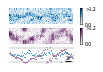

In [5]:
reload(td)
rec = recss_attp2_Kir[0][0]
td.plot_2c_sample_trace_paper_20200320(rec, axs=[], fig_size=(1.3,1), tlim=[27,51], 
            gs_width_ratios=[50,1], auto_offset=False, plot_bar=False, ms=1,
            cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.blue, ph.magenta], vm=[0,1.2], bar_length=2, fs=5)
# ph.save('Fig5f-ctrl', exts=['pdf'])

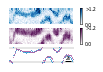

In [6]:
reload(td)
rec = recss_v63_Kir[6][0]
td.plot_2c_sample_trace_paper_20200320(rec, axs=[], fig_size=(1.3,1), tlim=[1,25], 
            gs_width_ratios=[50,1], auto_offset=False, plot_bar=False, ms=1,
            cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.blue, ph.magenta], vm=[0,1.2], bar_length=2, fs=5)
# ph.save('Fig5f-exp', exts=['pdf'])

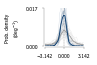

In [25]:
reload(td)
td.plot_hist_2angular_variables([recss_attp2_Kir, recss_v63_Kir], fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['eb.c1.phase', 'eb.c1.phase',], label_sigs2=['fb.c1.phase','fb.c1.phase'], 
            colors=[ph.grey4, ph.dblue],
            ms=2, ylim=[0,0.017], alpha_indi=0.25, lw_indi=0.3, lw=.8, filters=[],
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False)
# ph.save('Fig5g', exts=['pdf'])

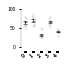

In [26]:
reload(td)
groups_Kir = [recss_attp2_Kir, recss_v63_attp2, recss_v63_Kir, recss_67D09_attp2, recss_67D09_Kir]
td.barplot_2angular_variables(groups_Kir, ax=False, fig_size=(.7,.7), 
            label_sig1='eb.c1.phase', label_sig2='fb.c1.phase', ms_indi=1, fs=5, ylim=[0,100], yticks=[0,50,100],
            group_info=[], group_labels=[], label_axeratio=-.1,
            col_width=.1, subgroup_gap=0.1, group_gap=.5, plot_scale=1, margin_to_yaxis=.2, figsize_height=5,
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False,)
# ph.save('Fig5h', exts=['pdf'])

# LN--GtACR

In [3]:
reload(im)
names = [('2020082608',), ('2020082610',), ('2020082701', '2020082702'), ('2020082705', '2020082706'), 
         ('2020082709', '2020082710'), ('2020082713', '2020082714'),  ('2020082717',),]
recss_attp2_GtACR = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_GtACR/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
        prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020082728', '2020082729'), ('2020082801',), ('2020082802',), ('2020082803',), ('2020082804', '2020082805'),
         ('2020092101',), ]
recss_v64_attp2 = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--v64-attp2/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
        prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020082605',), ('2020082611',), ('2020082612', '2020082613'), ('2020082719', '2020082720'),
         ('2020082809', '2020082810'), ('2020082813', '2020082814', '2020082815'), ('2020082816',), ]
recss_v64_GtACR = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--VT064880-GtACR/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
        prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020092103',), ('2020092202',), ('2020092203', '2020092204'), ('2020092206',), ('2020092207',), ('2020092704',),
        ('2020092901',), ('2020092902',),]
recss_48a_attp2 = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--48A09_Gal4-attp2/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
        prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020091904',), ('2020092108',), ('2020092118',), ('2020092701',), ('2020092801',), 
         ('2020092806', '2020092807'), ('2020100204',),]
recss_48a_GtACR = im.get_recs(names, 'EIP', parent_folder='../../../60D05_37G12_LexA-LexAop_GC6f--48A09-GtACR/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=False,
        prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_26/2020_08_26-008/2020_08_26_0008.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_26/2020_08_26-010/2020_08_26_0010.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-001/2020_08_27_0001.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-002/2020_08_27_0002.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-005/2020_08_27_0005.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-006/2020_08_27_0006.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-009/2020_08_27_0009.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-010/2020_08_27_0010.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-013/2020_08_27_0013.abf
../../../60D05_37G12_LexA-LexAop_GC6f--attp2-UAS_Kir/2020_08_27/2020_08_27-014/2020_08_27_0014.abf
../../../6

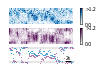

In [8]:
reload(td)
rec = recss_attp2_GtACR[2][0]
td.plot_2c_sample_trace_paper_20200320(rec, axs=[], fig_size=(1.3,1), tlim=[1,25], 
            gs_width_ratios=[50,1], auto_offset=False, plot_bar=False, ms=1,
            cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.blue, ph.magenta], vm=[0,1.2], bar_length=2, fs=5)
# ph.save('Fig5j-ctrl', exts=['pdf'])

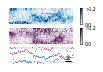

In [9]:
reload(td)
rec = recss_v64_GtACR[2][0]
td.plot_2c_sample_trace_paper_20200320(rec, axs=[], fig_size=(1.3,1), tlim=[7,31], 
            gs_width_ratios=[50,1], auto_offset=False, plot_bar=False, ms=1,
            cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.blue, ph.magenta], vm=[0,1.2], bar_length=2, fs=5)
# ph.save('Fig5j-exp', exts=['pdf'])

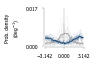

In [20]:
reload(td)
td.plot_hist_2angular_variables([recss_attp2_GtACR, recss_v64_GtACR], fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['eb.c1.phase', 'eb.c1.phase',], label_sigs2=['fb.c1.phase','fb.c1.phase'], 
            colors=[ph.grey4, ph.dblue], pwm_specificstimid=0,
            ms=2, ylim=[0,0.017], alpha_indi=0.25, lw_indi=0.3, lw=.8, filters=[],
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False)
# ph.save('Fig5k', exts=['pdf'])

[[10.80672753097545, 50.28473439838666, 20.28758713539466, -17.78486165852908, 13.643297160447332, -27.582971040745235, 11.53619547803379], [-13.75278571503793, -5.1730703817250685, 24.187700757587095, -8.77996456054396, 23.015854995592917, 6.367832644256936], [171.5074440048225, -157.46456476391347, 140.0683970576601, -171.16373153973072, 169.0726853455974, 171.5011875004226, 144.88626216059487], [-30.298708075148483, -0.8676026732478306, 16.98113964720858, -6.064671991967771, -64.0017329166344, -11.070066880339027, -15.93882813098287, -1.1388573241061692], [138.91064226711086, -135.3358142939831, -102.30136548052542, 127.58955857884473, 104.41063016923857, -88.25327488308726, 162.4696320604421]]


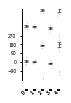

In [6]:
reload(td)
groups_gtacr = [recss_attp2_GtACR, recss_v64_attp2, recss_v64_GtACR, recss_48a_attp2, recss_48a_GtACR]
td.barplot_2angular_variables(groups_gtacr, ax=False, fig_size=(.7,1.3), 
            label_sig1='eb.c1.phase', label_sig2='fb.c1.phase', ms_indi=1, fs=5, ylim=[-181,541], yticks=[-90,0,90,180,270],
            group_info=[], group_labels=[], label_axeratio=-.1, 
            col_width=.1, subgroup_gap=0.1, group_gap=.5, plot_scale=1, margin_to_yaxis=.2, figsize_height=5,
            y_type='mean', specific_stimid=0, cut_start_stimid_s=0, cut_end_stimid_s=0, pwm_specificstimid=0,
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False,)
# ph.save('Fig5l', exts=['pdf'])

# CsChrimson--SpsP

../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-002/2020_02_26_0002.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-005/2020_02_26_0005.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-009/2020_02_26_0009.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-011/2020_02_26_0011.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-015/2020_02_26_0015.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-018/2020_02_26_0018.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-021/2020_02_26_0021.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_27/2020_02_27-002/2020_02_27_0002.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/20

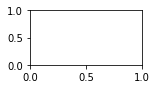

In [3]:
reload(im)
names = [('2020022602',), ('2020022605',), ('2020022609',), ('2020022611',), ('2020022615',), ('2020022618',),
         ('2020022621',), ('2020022702',), ('2020022709',), ('2020022713',), 
         ]
recss_attp2_csc = im.get_recs(names, 'EIP', parent_folder='../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=True,
        firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [
    ('2020052001',), 
    ('2020052002', '2020052003', '2020052004',),
    ('2020052005', '2020052006', '2020052007',),
    ('2020052008', '2020052009',),
    ('2020052010', '2020052011',), 
    ('2020052012', '2020052013',), 
    ('2020052014', '2020052015', '2020052016', '2020052017'), 
    ('2020052018',),
]
recss_SS52567_ctrl = im.get_recs(names, 'EIP', parent_folder='../../../60D05_VT005534_LexA-LexAop_GC6f--SS52567/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=True,
        firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

names = [('2020011701',), ('2020011702',), ('2020011704',), ('2020012006',), ('2020012009',), ('2020012011',), 
         ('2020012105',), ('2020012114',),]
recss_spsp_csc = im.get_recs(names, 'EIP', parent_folder='../../../60D05_VT005534_LexA-LexAop_GC6f--SS52567-UAS_CsChrimson_mVenus/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=True,
        firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

In [3]:
reload(im)
names = [('2020022615',),]
recss_attp2_csc_ = im.get_recs(names, 'EIP', parent_folder='../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=True,
        firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)
names = [('2020012011',),]
recss_spsp_csc_= im.get_recs(names, 'EIP', parent_folder='../../../60D05_VT005534_LexA-LexAop_GC6f--SS52567-UAS_CsChrimson_mVenus/',
        imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, fix_wb_tracking_error_ignore_rec_end=True,
        firstwedge_cheng=True, prairie2019=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

../../../60D05_VT005534_LexA-LexAop_GC6f--UAS_CsChrimson_mVenus-attp2/2020_02_26/2020_02_26-015/2020_02_26_0015.abf
../../../60D05_VT005534_LexA-LexAop_GC6f--SS52567-UAS_CsChrimson_mVenus/2020_01_20/2020_01_20-011/2020_01_20_0011.abf


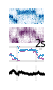

In [6]:
reload(td)
td.plot_2c_td_paper_20200320(recss_attp2_csc_, recss_attp2_csc_[0][0], fig_size=(.62,1.332), ncol=1, 
            stim_method='pwm', stimids=[8], trial_id=[7], t_win_plot=[-5,17,0], vlines=[0,12], t_win_stop=[-1,18],
            vm=[0,1.2], cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.magenta, ph.blue],
            ms=2, ms_phase_ave=.8, lw_indi=0.3, c_indi=ph.grey7, alpha_indi=0.2, c='black', lw_dash=.3, fs=5,)
# ph.save('Fig5n-ctrl', exts=['pdf'])

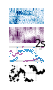

In [5]:
reload(td)
td.plot_2c_td_paper_20200320(recss_spsp_csc_, recss_spsp_csc_[0][0], fig_size=(.62,1.332), ncol=1, 
            stim_method='pwm', stimids=[8], trial_id=[3], t_win_plot=[-5,17,0], vlines=[0,12], t_win_stop=[-1,18],
            vm=[0,1.2], cmaps=[plt.cm.Blues, ph.Magentas], colors=[ph.magenta, ph.blue],
            ms=2, ms_phase_ave=.8, lw_indi=0.3, c_indi=ph.grey5, alpha_indi=0.2, c='black', lw_dash=.3, fs=5,)
# ph.save('Fig5n-exp', exts=['pdf'])

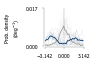

In [36]:
reload(td)
reload(ph)
td.plot_hist_2angular_variables([recss_attp2_csc, recss_spsp_csc,], fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['eb.c1.phase', 'eb.c1.phase', ], label_sigs2=['fb.c1.phase', 'fb.c1.phase', ],
            colors=[ph.grey4, ph.dblue],
            ms=2, ylim=[0,0.017], alpha_indi=0.15, lw_indi=0.3, lw=.8, filters=[], pwm_specificstimid=8,
            specific_stimid=0, cut_start_stimid_s=4, cut_end_stimid_s=0, 
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False)
# ph.save('Fig5o', exts=['pdf'])

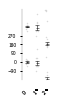

In [46]:
reload(td)
groups_csc = [recss_attp2_csc, recss_SS52567_ctrl, recss_spsp_csc]
td.barplot_2angular_variables(groups_csc, ax=False, fig_size=(.5,1.3), 
            label_sig1='eb.c1.phase', label_sig2='fb.c1.phase', ms_indi=1, fs=5, ylim=[-181,541], yticks=[-90,0,90,180,270],
            group_info=[], group_labels=[], label_axeratio=-.1, 
            col_width=.1, subgroup_gap=0.1, group_gap=.5, plot_scale=1, margin_to_yaxis=.2, figsize_height=5,
            y_type='mean', specific_stimid=0, cut_start_stimid_s=4, cut_end_stimid_s=0, pwm_specificstimid=8,
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False,)
# ph.save('Fig5p', exts=['pdf'])

## EPG-shi, PFR-GCaMP

In [3]:
reload(im)
reload(fbs)
names = [('2020011401',), ('2020011403',), ('2020011405',), ('2020011407',),]
recss_epg_pfr_25C = im.get_recs(names, 'FBCre', '../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/', 
                                imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020011402',), ('2020011404',), ('2020011406',), ('2020011408',),]
recss_epg_pfr_34C = im.get_recs(names, 'FBCre', '../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/', 
                                imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020052301',), ('2020052302',), ('2020052303',), ('2020052304',), ('2020052401',), ('2020052402',), ]
recss_37G12_6s_shi_ctrl_34C = im.get_recs(names, 'FBCre', '../../../37G12_LexA-LexAop_syt_GC6s__UAS_shi/', 
                        imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020052404',), ('2020052405',), ('2020052406',), ('2020052407',), ('2020052408',), ('2020052409',), ('2020052410',),]
recss_37G12_6s_60D05_ctrl_34C = im.get_recs(names, 'FBCre', '../../../37G12_LexA-LexAop_syt_GC6s__60D05_gal4/', 
                        imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020110801',), ('2020110804',), ('2020110807',), ('2020110811',), ('2020110814',)]
recss_77e_pfr_25C = im.get_recs(names, 'FBCre', '../../../37G12_LexA-LexAop_syt_GC6s__77E05_Gal4-UAS_shi/', 
                                imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020110802', '2020110803'), ('2020110805', '2020110806',), ('2020110808', '2020110809','2020110810'),
         ('2020110812', '2020110813'), ('2020110815',),]
recss_77e_pfr_34C = im.get_recs(names, 'FBCre', '../../../37G12_LexA-LexAop_syt_GC6s__77E05_Gal4-UAS_shi/', 
                                imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

names = [('2020110901',), ('2020110902',), ('2020110903',), ('2020110904',), ('2020110905',), ('2020110906',),]
recss_77e_ctrl_34C = im.get_recs(names, 'FBCre', '../../../37G12_LexA-LexAop_syt_GC6s__77E05_Gal4/', 
                                imtype=im.FanshapeBody, seg_algo_fb='auto_seg', prairie2019=True, wedge_num=16)

../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-001/2020_01_14_0001.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-003/2020_01_14_0003.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-005/2020_01_14_0005.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-007/2020_01_14_0007.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-002/2020_01_14_0002.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-004/2020_01_14_0004.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-006/2020_01_14_0006.abf
../../../37G12-LexA_LexAop_syt_GC6s__60D05-Gal4_UAS-shi/2020_01_14/2020_01_14-008/2020_01_14_0008.abf
../../../37G12_LexA-LexAop_syt_GC6s__UAS_shi/2020_05_23/2020_05_23-001/2020_05_23_0001.abf
../../../37G12_LexA-LexAop_syt_GC6s__UAS_shi/2020_05_23/2020_05_23-002/2020_05_23_0002.abf
..

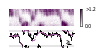

In [11]:
reload(td)
td.plot_1c_walk_sample_trace_paper_20200324(recss_37G12_6s_shi_ctrl_34C[0][0], axs=[], fig_size=(1.3, .7), 
                tlim=[8,42], gs_width_ratios=[50,1], plot_bar=True,
                cmap=ph.Magentas, vm=[0,1.2], color=ph.magenta, bar_length=2, fs=5, auto_offset=True, ms=.8)
# ph.save('Fig5b-ctrl', exts=['pdf'])

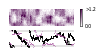

In [12]:
reload(td)
td.plot_1c_walk_sample_trace_paper_20200324(recss_epg_pfr_34C[0][0], axs=[], fig_size=(1.3, .7), 
                tlim=[80,114], gs_width_ratios=[50,1], plot_bar=True,
                cmap=ph.Magentas, vm=[0,1.2], color=ph.magenta, bar_length=2, fs=5, auto_offset=True, ms=.8)
# ph.save('Fig5b-exp', exts=['pdf'])

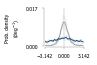

In [91]:
reload(td)
td.plot_hist_2angular_variables([recss_37G12_6s_shi_ctrl_34C, recss_epg_pfr_34C],  fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['fb.c1.phase', 'fb.c1.phase'], label_sigs2=['xbar','xbar'], colors=[ph.grey4, ph.dblue],
            ms=2, ylim=[0,0.017], alpha_indi=0.25, lw_indi=0.3, lw=.8,
            flightstop_detection=False, walkstand_detection=True, stim_visible=True, cancel_offset=True,)
# ph.save('Fig5c', exts=['pdf'])

[[38.13644426300075, 55.1975275733514, 44.21318880216976, 56.192149502327396, 32.50602823279313, 45.953617357941916], [37.19243110456896, 36.616541905492056, 41.14413860695373, 47.45153748369837, 42.28258246154509, 40.46198759542138, 62.459001285233725], [41.14971024049898, 41.24105588849701, 27.94684661418866, 42.34432842585026], [109.85938925194418, 94.66219920999104, 129.24671612303936, 130.6412378395744], [46.207022436606536, 39.57068470179819, 40.58411625831254, 36.05704041006584, 53.06223861412428, 38.86147011625286], [55.52443083785212, 48.255484866059035, 33.3537957826022, 58.27589479325277, 54.79218527640884], [110.72932427378122, 105.45363329380243, 121.43288769416725, 114.1650022437787, 95.02814051429436]]


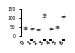

In [10]:
reload(td)
groups_shi = [recss_37G12_6s_shi_ctrl_34C, recss_37G12_6s_60D05_ctrl_34C, recss_epg_pfr_25C, recss_epg_pfr_34C, 
              recss_77e_ctrl_34C, recss_77e_pfr_25C, recss_77e_pfr_34C]
td.barplot_2angular_variables(groups_shi, ax=False, fig_size=(.8,.5), label_sig1='fb.c1.phase', label_sig2='xbar',
            group_info=[], group_labels=[], label_axeratio=-.1, ms_indi=1, fs=5, ylim=[0,150], yticks=[0,50,100,150], 
            col_width=.1, subgroup_gap=0.1, group_gap=.4, plot_scale=1, margin_to_yaxis=.2, figsize_height=5,
            flightstop_detection=False, walkstand_detection=True, stim_visible=True, cancel_offset=True,)
# ph.save('Fig5d', exts=['pdf'])